<h1 style = "font-family: Serif; font-size:55px; font-style: normal; letter-spacing: 3px; background-color: #f6f5f5; color :#0D0D0F; border-radius: 100px 100px; text-align: center;"> END-TO-END SENTIMENT ANALYSIS </h1>

<h1 style = "font-family: Serif; font-size: 40px; font-style: normal; letter-spacing: 3px; background-color: #f6f5f5; color :#0D0D0F; border-radius: 100px 100px; text-align: center;"> TABLE OF CONTENTS </h1>


* [1. Introduction](#1)
    * [1.1 Libraries](#1.1)
* [2. Data Preparation & Data Preprocessing}](#2)
    * [2.1 Web Scraping to Obtain Data](#2.1)
    * [2.2 Import Dataset](#2.2)
    * [2.3 Data Cleaning & Applying NLTK](#2.3)
* [3. Exploratory Data Analysis (EDA)](#3)
    * [3.1 Data Visualization & Data Analysis](#3.1)
    * [3.2 Keyword Analysis](#3.2)
* [4. Modelling & Sentiment Classification](#4)
    * [4.1 VADER Sentiment Scoring](#4.1)
    * [4.2 RoBERTa Pretrained Model](#4.2)
    * [4.3 Compare Models](#4.3)
* [5. Conclusion](#5)

<a id = '1'></a>

<h2 style = "font-family: Serif; font-size: 50px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 1. INTRODUCTION </h2>

In the gaming industry, *understanding player sentiment* is crucial for game developers to refine gameplay experiences and foster greater player satisfaction. Sentiment analysis, using natural language processing (NLP) techniques, provides valuable insights into user feedback, helping developers uncover both positive and negative aspects of a game. This project focuses on analyzing Steam reviews for **Black Myth: Wukong**, aiming to identify key drivers behind user experiences. These insights are essential for guiding marketing strategies, content development, and customer engagement efforts.

<h3 style = "font-family: Serif; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> PROBLEM STATEMENT </h3>

> We aim to develop a sentiment analysis model using natural language processing (NLP) techniques to analyze Steam reviews for **Black Myth: Wukong**. This model will identify key drivers of positive and negative user sentiment, providing actionable insights to help game developers address weaknesses and implement data-driven improvements that enhance player satisfaction.

## About This Game
**Black Myth: Wukong** is an action RPG rooted in Chinese mythology. The story is based on Journey to the West, one of the Four Great Classical Novels of Chinese literature. You shall set out as the Destined One to venture into the challenges and marvels ahead, to uncover the obscured truth beneath the veil of a glorious legend from the past.

Some information about the game **[Black Myth: Wukong](https://store.steampowered.com/app/2358720/Black_Myth_Wukong/)** are as follows:
* Game ID : 2358720
* URL (Steam Reviews) : https://steamcommunity.com/app/2358720/reviews/
* Genre : Action, Adventure, RPG
* Tags : Mythology, Action RPG, Action, Souls-like, RPG, Combat, Story Rich, Singleplayer, Drama, Action-Adventure, Dark Fantasy, Atmospheric, Adventure, 3D, Fantasy, Hack and Slash, Third Person, Difficult, Music, Violent
* Developer : Game Science
* Publisher : Game Science

<h3 style = "font-family: Serif; font-size: 30px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> ADDITIONAL READING </h3>

* [Black Myth: Wukong (Wikipedia)](https://en.wikipedia.org/wiki/Black_Myth:_Wukong)
* [Black Myth: Wukong (IGN)](https://www.ign.com/articles/black-myth-wukong-review-pc)
* [Why Everyone is Talking About Sentiment Analysis Using Product Review Data (Yogi)](https://www.meetyogi.com/post/why-everyone-is-talking-about-sentiment-analysis-using-product-review-data)
* [Discover Sentiment Analysis with Product Review Data](https://debutify.com/blog/sentiment-analysis-using-product-review-data)

<a id = '1.1'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 1.1 LIBRARIES </h2>

In [1]:
# Install some packages

# !pip install selenium
# !pip install msedge-selenium-tools
# !pip install wordcloud

In [2]:
%matplotlib inline

# Import useful libraries
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import re
import time
from textblob import TextBlob
from scipy.special import softmax
from tqdm.notebook import tqdm
from collections import Counter

# Seaborn configurations
sns.set_style('darkgrid')

# Import modules for web scraping
import selenium
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

# Import NLTK
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Import transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

# Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Import wordcloud
from wordcloud import WordCloud

In [3]:
# Download the Punkt Tokenizer Models
nltk.download('punkt')

# Download nltk words
nltk.download('wordnet')
nltk.download('words')

# Download Vader
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
# Check selenium version
selenium.__version__

'4.26.1'

<a id = '2'></a>

<h2 style = "font-family: Serif; font-size: 50px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 2. DATA PREPARATION & DATA PREPROCESSING </h2>

<a id = '2.1'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 2.1 WEB SCRAPING TO OBTAIN DATA </h2>

First, we need to collect some data (player reviews) by scraping the steam review page for the game. In this project, we collected reviews from *10 September 2024* to *14 November 2024* (around 2 months). For full details, see `scraping_steam.ipynb`.

<a id = '2.2'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 2.2 IMPORT DATASET </h2>

We now import our dataset saved as `wukong-dataset.csv` (obtained by scraping).

In [5]:
# Import our dataset (scraped)
df = pd.read_csv('wukong-dataset.csv')

In [6]:
# Check the shape of our DataFrame
df.shape

(15198, 6)

In [7]:
# Check to make sure there are no duplicated rows
df.duplicated().sum()

0

In [8]:
# Check the first five rows of our dataset
df.head()

,Unnamed: 0,ReviewText,RecommendedOrNot,ReviewLength,PlayHours,DatePosted
0,0,Monke,Recommended,5,20.7 hrs on record,Posted: 14 November
1,1,8/10,Recommended,4,51.6 hrs on record,Posted: 14 November
2,2,"this game is awesome, hard to track all moves ...",Recommended,95,7.3 hrs on record,Posted: 13 November
3,3,Pain,Recommended,4,5.1 hrs on record,Posted: 13 November
4,4,Monke,Recommended,5,30.9 hrs on record,Posted: 13 November


In [9]:
# Check the information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15198 entries, 0 to 15197
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        15198 non-null  int64 
 1   ReviewText        15150 non-null  object
 2   RecommendedOrNot  15198 non-null  object
 3   ReviewLength      15198 non-null  int64 
 4   PlayHours         15198 non-null  object
 5   DatePosted        15198 non-null  object
dtypes: int64(2), object(4)
memory usage: 712.5+ KB


<a id = '2.3'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 2.3 DATA CLEANING & APPLYING NLTK </h2>

After seeing some information about our dataset, we will start doing some data cleaning. We will clean up the columns and apply NLTK on our dataset (specifically the 'ReviewText' column). 

1. Convert all the review texts to lowercase.
2. Remove punctuation to focus only on words.
3. Tokenize all the review texts, i.e. to break the texts into individual words.
4. Remove stopwords such as "is", "the", "and" etc.
5. Stemming/Lemmatization, i.e. to reduce words to their base form, ignoring the tenses.
6. Remove any extra spaces.
  
The cleaned dataset will be saved as `wukong-cleaned-dataset.csv`.

For full details, see `data_cleaning.ipynb`.

<a id = '3'></a>

<h2 style = "font-family: Serif; font-size: 50px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3. EXPLORATORY DATA ANALYSIS (EDA) </h2>

<a id = '3.1'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3.1 DATA VISUALIZATION & DATA ANALYSIS </h2>

# Load Cleaned Dataset

In [10]:
# Read the cleaned dataset we saved earlier
df = pd.read_csv('wukong-cleaned-dataset.csv')

In [11]:
# Check the first five rows of our dataset
df.head(10)

,Id,CleanedReviewText,RecommendedOrNot,ReviewLength,PlayHours,DatePosted
0,1,monke,Recommended,5,20.7,14-11-2024
1,2,8/10,Recommended,4,51.6,14-11-2024
2,3,game awesome hard track move start muscle memo...,Recommended,95,7.3,13-11-2024
3,4,pain,Recommended,4,5.1,13-11-2024
4,5,monke,Recommended,5,30.9,13-11-2024
5,6,good,Recommended,4,116.9,13-11-2024
6,7,game frekaing peak reason peak make idc im gla...,Recommended,97,6.3,13-11-2024
7,8,literally find say loud dont think fun gameimm...,Not Recommended,486,5.7,13-11-2024
8,9,fir time play soulslike game really enjoy perh...,Recommended,236,5.5,13-11-2024
9,10,first four chapter really impressive final bos...,Recommended,286,39.5,13-11-2024


In [12]:
# Check the shape of updated DataFrame
df.shape

(15198, 6)

In [13]:
# Check the information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15198 entries, 0 to 15197
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 15198 non-null  int64  
 1   CleanedReviewText  14951 non-null  object 
 2   RecommendedOrNot   15198 non-null  object 
 3   ReviewLength       15198 non-null  int64  
 4   PlayHours          15198 non-null  float64
 5   DatePosted         15198 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 712.5+ KB


# Count of Recommendations Visualization

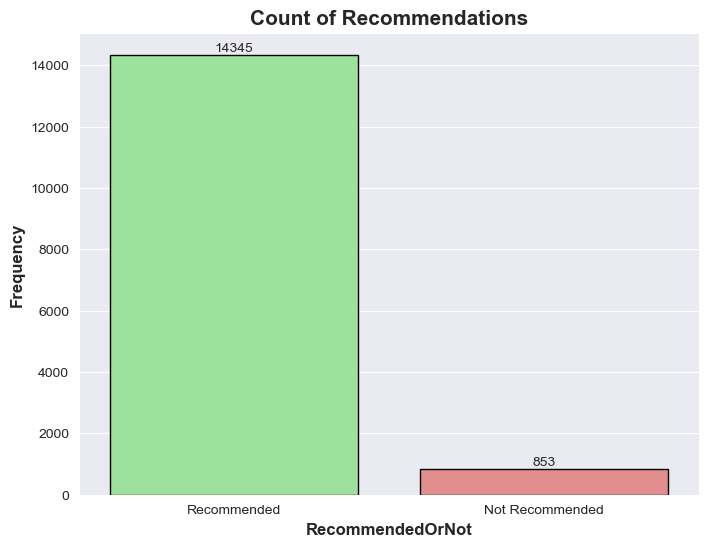

In [14]:
# Compare the amount of recommended & NOT recommended
# We don't drop the rows with null values in 'CleanedReviewText' yet since it does not affect this

plt.figure(figsize=(8,6))
ax = sns.countplot(hue='RecommendedOrNot', x='RecommendedOrNot', edgecolor='black', data=df, palette=['lightgreen', 'lightcoral'], legend=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title('Count of Recommendations', fontsize=15, fontweight='heavy')
ax.set_xlabel("RecommendedOrNot", fontsize=12, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=12, fontweight='bold')

plt.savefig('recommendedornot-bar.png')
plt.show()

<a id = '3.2'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 3.2 KEYWORD ANALYSIS </h2>

Now, we would like to do **Keyword Analysis**: 

*Identify common keywords or phrases associated with positive and negative reviews to see what topics are often praised or criticized.*

# Data Cleaning
Since we need to analyse the reviews, the rows with null values in 'CleanedReviewText' will not provide any insights for us. Hence, we will now drop those rows.

In [15]:
# Drop the rows with null values in 'CleanedReviewText' (Only a small percentage)
df = df.dropna(subset=['CleanedReviewText'])

# Reset index after dropping rows and reassign ID
df = df.reset_index(drop=True)

# Check if this works
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14951 entries, 0 to 14950
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 14951 non-null  int64  
 1   CleanedReviewText  14951 non-null  object 
 2   RecommendedOrNot   14951 non-null  object 
 3   ReviewLength       14951 non-null  int64  
 4   PlayHours          14951 non-null  float64
 5   DatePosted         14951 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 701.0+ KB


In [16]:
# Reassign 'Id' again since we dropped some rows

# Drop the 'Id' column
df = df.drop(['Id'], axis=1)

In [17]:
# Create an 'Id' column
df['Id'] = df.index + 1

# Move the 'Id' column to the first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [18]:
# Save our updated dataset as a csv file
df.to_csv('wukong-cleaned-dataset-updated.csv', index=False)

# Keyword Analysis
Next, we will start doing **Keyword Analysis**.

In [19]:
# Read the cleaned dataset we saved earlier
df = pd.read_csv('wukong-cleaned-dataset-updated.csv')

In [20]:
# Check the first five rows of our dataset
df.head(10)

,Id,CleanedReviewText,RecommendedOrNot,ReviewLength,PlayHours,DatePosted
0,1,monke,Recommended,5,20.7,14-11-2024
1,2,8/10,Recommended,4,51.6,14-11-2024
2,3,game awesome hard track move start muscle memo...,Recommended,95,7.3,13-11-2024
3,4,pain,Recommended,4,5.1,13-11-2024
4,5,monke,Recommended,5,30.9,13-11-2024
5,6,good,Recommended,4,116.9,13-11-2024
6,7,game frekaing peak reason peak make idc im gla...,Recommended,97,6.3,13-11-2024
7,8,literally find say loud dont think fun gameimm...,Not Recommended,486,5.7,13-11-2024
8,9,fir time play soulslike game really enjoy perh...,Recommended,236,5.5,13-11-2024
9,10,first four chapter really impressive final bos...,Recommended,286,39.5,13-11-2024


In [21]:
# Check the shape of updated DataFrame
df.shape

(14951, 6)

In [22]:
# Check the information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14951 entries, 0 to 14950
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 14951 non-null  int64  
 1   CleanedReviewText  14951 non-null  object 
 2   RecommendedOrNot   14951 non-null  object 
 3   ReviewLength       14951 non-null  int64  
 4   PlayHours          14951 non-null  float64
 5   DatePosted         14951 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 701.0+ KB


# Wordcloud
First, let us try visualizing what words appear most for 'Recommended' and 'Not Recommended' using wordcloud.

In [23]:
# Define a function to create a wordcloud (based on 'CleanedReviewText')
def plot_wordcloud(series, output_filename, title, max_words=200):
    '''
    Create and save a word cloud.
    '''
    # Generate the word cloud
    wordcloud = WordCloud(max_words=max_words, background_color='white').generate(' '.join(series.astype(str)))
    
    # Plot the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16, weight='bold')
    plt.tight_layout()

    # Save the word cloud image
    plt.savefig(output_filename + '.png')
    plt.show()

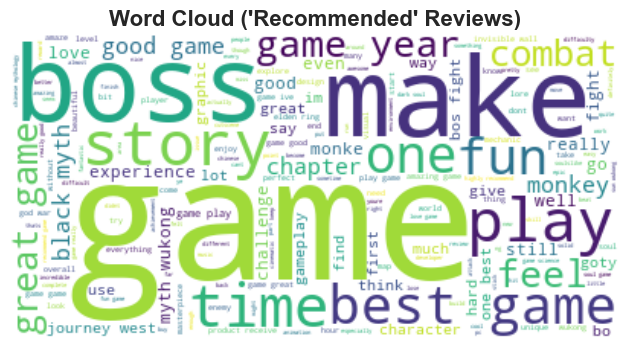

In [24]:
# Create a wordcloud for 'Recommended'
# Filter the DataFrame to include only "Recommended" reviews
recommended_reviews = df[df['RecommendedOrNot'] == 'Recommended']['CleanedReviewText']

# Create a wordcloud based on 'CleanedReviewText'
plot_wordcloud(recommended_reviews, output_filename='recommended_wordcloud', title="Word Cloud ('Recommended' Reviews)")

In [25]:
# List out the most common 'Recommended' words (top 20 most frequent)
# Combine all reviews into one text
recommended_text = ' '.join(recommended_reviews)

# Tokenize text
recommended_tokens = nltk.word_tokenize(recommended_text)

# Replace 'bos' with 'boss' in the tokens
recommended_tokens = ['boss' if word == 'bos' else word for word in recommended_tokens]

# Count the frequency of each word
recommended_word_counts = Counter(recommended_tokens)

# Get the most common words (top 20 most frequent)
most_common_recommended_words = recommended_word_counts.most_common(20)

# Convert the most common words into a DataFrame
common_recommended_words_df = pd.DataFrame(most_common_recommended_words, columns=['Word', 'Frequency'])

# Display the DataFrame
common_recommended_words_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Word,game,boss,good,play,like,story,great,get,fun,one,best,make,combat,time,monkey,really,wukong,fight,feel,graphic
Frequency,14232,2876,2737,2427,2267,2015,1879,1748,1445,1402,1390,1371,1337,1334,1295,1196,1145,1129,1090,1029


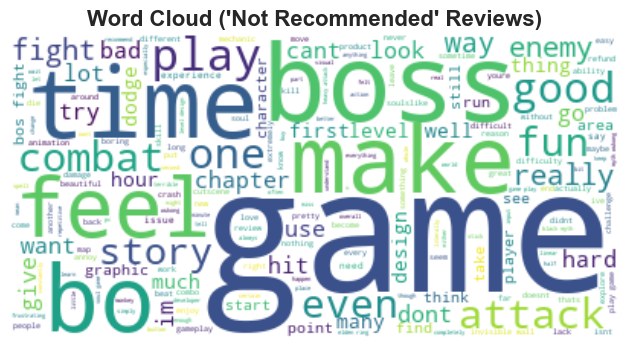

In [26]:
# Create a wordcloud for 'Not Recommended'
# Filter the DataFrame to include only "Not Recommended" reviews
not_recommended_reviews = df[df['RecommendedOrNot'] == 'Not Recommended']['CleanedReviewText']

# Create a wordcloud based on 'CleanedReviewText'
plot_wordcloud(not_recommended_reviews, output_filename='not_recommended_wordcloud', title="Word Cloud ('Not Recommended' Reviews)")

In [27]:
# List out the most common 'Not Recommended' words (top 20 most frequent)
# Combine all reviews into one text
not_recommended_text = ' '.join(not_recommended_reviews)

# Tokenize text
not_recommended_tokens = nltk.word_tokenize(not_recommended_text)

# Replace 'bos' with 'boss' in the tokens
not_recommended_tokens = ['boss' if word == 'bos' else word for word in not_recommended_tokens]

# Count the frequency of each word
not_recommended_word_counts = Counter(not_recommended_tokens)

# Get the most common words (top 20 most frequent)
most_common_not_recommended_words = not_recommended_word_counts.most_common(20)

# Convert the most common words into a DataFrame
common_not_recommended_words_df = pd.DataFrame(most_common_not_recommended_words, columns=['Word', 'Frequency'])

# Display the DataFrame
common_not_recommended_words_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Word,game,boss,like,get,time,play,attack,make,fight,dont,feel,even,good,combat,design,one,really,dodge,story,fun
Frequency,1840,886,506,470,361,325,313,301,272,247,237,230,208,208,206,201,193,182,178,173


# Data Analysis Based on Positive & Negative Themes
It appears that wordcloud is not a suitable visualization in this case since it is very difficult to see the difference. Let us try to manually define positive/negative themes and their associated keywords (depending on the most common words found above and common words in the **gaming** industry). In particular, we will separate the reviews into a few categories as follows:

## Positive Themes
* **Performance**: "good", "great", "best", "amazing", "smooth", "fast", "playable", "responsive", "stable", "optimize"

* **Mechanics**: "mechanics", "play", "fun", "boss", "combat", "fight", "gameplay", "attack", "action", "control", "interaction", "enemy"

* **Storyline**: "story", "plot", "narrative", "character", "end", "ending", "wukong", "monkey", "immersive", "dialogue", "lore"

* **Graphics**: "graphic", "visual", "art", "design", "beautiful", "animation", "realistic", "textures", "scenery"

* **Difficulty**: "easy", "challenging", "manageable", "fair", "perfect", "balance", "rewarding", "adaptive", "learning curve", "grind"

## Negative Themes
* **Performance**: "good", "bad", "worst", "awful", "lag", "slow", "crash", "fps", "performance", "unstable", "unresponsive", "glitch", "lag", "laggy", "disconnect", "optimize"

* **Mechanics**: "mechanics", "play", "fun", "boss", "combat", "fight", "gameplay", "attack", "action", "control", "interaction", "enemy", "dodge", "invisible wall", "broken", "tedious"

* **Storyline**: "story", "plot", "narrative", "character", "end", "ending", "wukong", "monkey", "immersive", "dialogue", "lore", "boring", "predictable", "disconnected", "shallow"

* **Graphics**: "graphic", "visual", "art", "design", "beautiful", "animation", "realistic", "textures", "scenery", "ugly", "blurry", "pixelated", "poor"

* **Difficulty**: "hard", "difficulty", "challenging", "unfair", "frustrate", "frustrating", "impossible", "punish", "punishing", "grind"

# Data Visualization (Positive Themes)

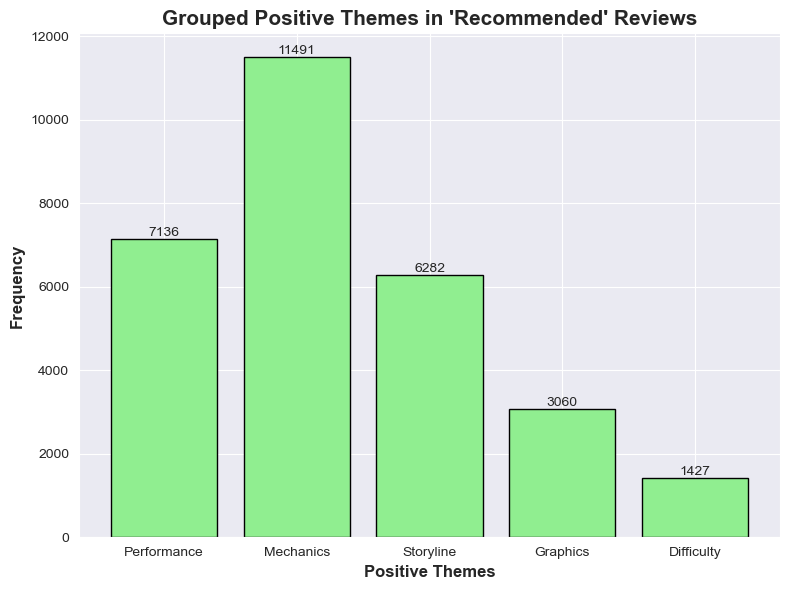

In [28]:
# Define positive themes ('Recommended' Reviews) based on the most common positive words & some common words in the gaming industry
positive_themes = {
    "Performance": ["good", "great", "best", "amazing", "smooth", "fast", "playable", "responsive", "stable", "optimize"],
    "Mechanics": ["mechanics", "play", "fun", "boss", "combat", "fight", "gameplay", "attack", "action", "control", "interaction", "enemy"],
    "Storyline": ["story", "plot", "narrative", "character", "end", "ending", "wukong", "monkey", "immersive", "dialogue", "lore"],
    "Graphics": ["graphic", "visual", "art", "design", "beautiful", "animation", "realistic", "textures", "scenery"],
    "Difficulty": ["easy", "challenging", "manageable", "fair", "perfect", "balance", "rewarding", "adaptive", "learning curve", "grind"]
}

# Count occurrences for each positive theme
recommended_theme_counts = {theme: sum(recommended_word_counts[word] for word in words if word in recommended_word_counts) for theme, words in positive_themes.items()}

# Plot positive feedback by theme in 'Recommended' reviews
plt.figure(figsize=(8, 6))
plt.bar(list(recommended_theme_counts.keys()), list(recommended_theme_counts.values()), color='lightgreen', edgecolor='black')
plt.title("Grouped Positive Themes in 'Recommended' Reviews", fontsize=15, fontweight='heavy')
plt.xlabel("Positive Themes", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')

# Add count labels on top of each bar for 'Recommended' reviews
for i, v in enumerate(recommended_theme_counts.values()):
    plt.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.savefig('positive-themes.png')
plt.show()

# Data Visualization (Negative Themes)

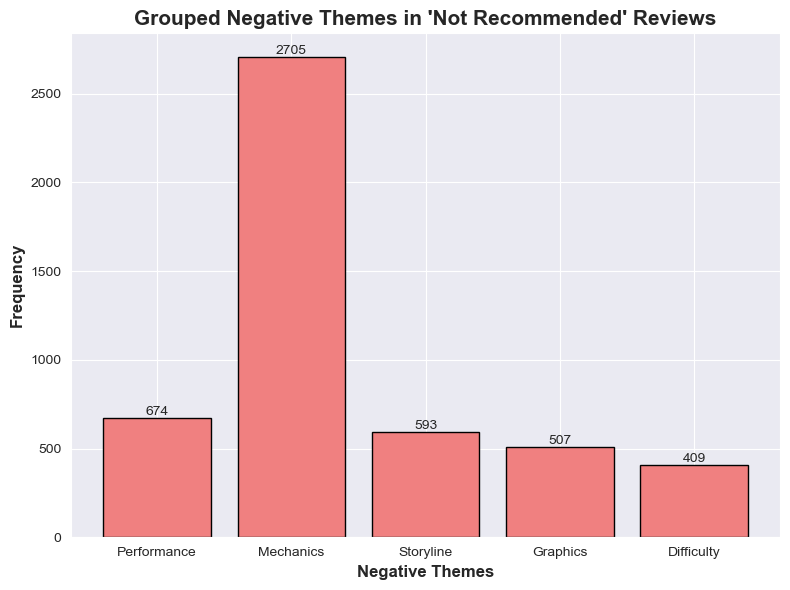

In [29]:
# Define negative themes ('Not Recommended' Reveiws) based on the most common positive words & some common words in the gaming industry
negative_themes = {
    "Performance": ["good", "bad", "worst", "awful", "lag", "slow", "crash", "fps", "performance", "unstable", "unresponsive", "glitch", "lag", "laggy", "disconnect", "optimize"],
    "Mechanics": ["mechanics", "play", "fun", "boss", "combat", "fight", "gameplay", "attack", "action", "control", "interaction", "enemy", "dodge", "invisible wall", "broken", "tedious"],
    "Storyline": ["story", "plot", "narrative", "character", "end", "ending", "wukong", "monkey", "immersive", "dialogue", "lore", "boring", "predictable", "disconnected", "shallow"],
    "Graphics": ["graphic", "visual", "art", "design", "beautiful", "animation", "realistic", "textures", "scenery", "ugly", "blurry", "pixelated", "poor"],
    "Difficulty": ["hard", "difficulty", "challenging", "unfair", "frustrate", "frustrating", "impossible", "punish", "punishing", "grind"],
}

# Count occurrences for each negative theme
not_recommended_theme_counts = {theme: sum(not_recommended_word_counts[word] for word in words if word in not_recommended_word_counts) for theme, words in negative_themes.items()}

# Plot neegative feedback by theme in 'Not Recommended' reviews
plt.figure(figsize=(8, 6))
plt.bar(list(not_recommended_theme_counts.keys()), list(not_recommended_theme_counts.values()), color='lightcoral', edgecolor='black')
plt.title("Grouped Negative Themes in 'Not Recommended' Reviews", fontsize=15, fontweight='heavy')
plt.xlabel("Negative Themes", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')

# Add count labels on top of each bar for 'Not Recommended' reviews
for i, v in enumerate(not_recommended_theme_counts.values()):
    plt.text(i, v + 0.05, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.savefig('negative-themes.png')
plt.show()

# What Can We Deduce From Our Plots?

## Main Observations

1. For both 'Recommended' and 'Not Recommended' reviews, **Mechanics** is the most discussed theme. This indicates that **gameplay mechanics** significantly impact player satisfaction and decision-making. As a reminder, **Mechanics** comprise the following components in our case:

    * **Positive Theme**: "mechanics", "play", "fun", "boss", "combat", "fight", "gameplay", "attack", "action", "control", "interaction", "enemy";

    * **Negative Theme**: "mechanics", "play", "fun", "boss", "combat", "fight", "gameplay", "attack", "action", "control", "interaction", "enemy", "dodge", "invisible wall", "broken", "tedious".

2. Moreover, **Performance** came second for both 'Recommended' and 'Not Recommended' reviews. As a reminder, **Performance** comprises the following in our case:

    * **Positive Theme**: "good", "great", "best", "amazing", "smooth", "fast", "playable", "responsive", "stable", "optimize";

    * **Negative Theme**: "good", "bad", "worst", "awful", "lag", "slow", "crash", "fps", "performance", "unstable", "unresponsive", "glitch", "lag", "laggy", "disconnect", "optimize".

## Interpretation of Our Observations
1. Players care most deeply about **gameplay mechanics**, i.e. how the game plays (e.g., combat, boss fights, and overall gameplay experience).
   
2. **Positive Mechanics** encourage recommendations; **Negative Mechanics** create dissatisfaction.
   
3. Even though the frequency of words related to **Mechanics** is higher in the 'Recommended' reviews, it is also the most prominent factor in 'Not Recommended' reviews. This suggests that *poorly designed **Mechanics*** are a significant cause of negative feedback.
   
4. Other than **Mechanics**, players also care a lot about the **in-game performance**, i.e. how the game performs (e.g., smoothness, stability, and lag).



# What Can We Do to Improve Players' Gaming Experiences & Increase Positive Feedback?

1. Focus on Iterating **Gameplay Mechanics**:
   
    * Invest in playtesting and iterative design to ensure **Mechanics** are *smooth*, *engaging*, and *fun*.

    <br>
2. Leverage Positive Feedback:

    * Highlight the strengths of **Mechanics** in marketing campaigns (e.g., "fluid combat", "fun gameplay" etc) to attract more players.
   
    * Use the 'Recommended' reviews as testimonials for successful **Mechanics** in promotional materials.

3. Improve Areas of Weakness:

    * Analyze the 'Not Recommended' reviews to identify problematic aspects of **Mechanics**. For instance, read the reviews including the words "boss", "combat", "fight", "attack", "dodg", "enemi" since these words appeared in the 'Not Recommended' reviews most and understand the specific issues and complaints players were having.
      
    * Potential reasons might include *Poor Gameplay Design*, *Bugs/Technical Issues*, and *Unbalanced Mechanics*.
      
    * Target updates or patches to address these **Mechanics**-related issues, possibly including *combat balance*, *boss fights*, or *game design flaws*.

4. Community Engagement:

    * Engage with the community to gather detailed feedback on Mechanics by means of surveys, forums, etc.
      
    * Show responsiveness by announcing and implementing improvements based on player suggestions.



# What's the Point of Doing This?
By improving players' gaming experiences and increasing positive feedbacks, we can create business values:

1. Increase Player Retention:
   
    * Smoother mechanics improve the overall gaming experience, reducing churn.
      
    <br>
    
2. Boost Sales:
   
    * Satisfied players who enjoy the mechanics are more likely to recommend the game to others.
      
   <br>
   
3. Reduce Negative Feedback:
   
    * By addressing common complaints, the volume of 'Not Recommended' reviews can be minimized.



# Conclusion
The most significant takeaway is that **gameplay mechanics** and **in-game performance** are critical to players' gaming experiences. When executed well, they lead to positive feedback, but when these aspects are poorly designed or optimized, they can result in significant dissatisfaction, leading to negative reviews.

<a id = '4'></a>

<h2 style = "font-family: Serif; font-size: 50px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 4. MODELLING AND SENTIMENT CLASSIFICATION </h2>

# Approaches

We will be doing sentiment analysis using two different techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach.
2. RoBERTa (Robustly optimized BERT approach) Pretrained Model form - We will use the [Twitter-roBERTa-base for Sentiment Analysis](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment) from Hugging Face.

<a id = '4.1'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 4.1 VADER SENTIMENT SCORING </h2>

We will use NLTK's `SentimentIntensityAnalyzer` to get the negative, neutral, positive, and compound scores of each text.

* This uses a **bag of words** approach:
  1. Stop words are removed. (We did this above)
  2. Each word is scored and combined to a total score.
 
**Note**: VADER does not require tokenization of words.

**Interpretation of Compound Scores**: 

* If the compound score is **<= -0.05**, we categorize the review as having a **negative sentiment**;
* If the compound score is **>= 0.05**, we categorize the review as having a **positive sentiment**;
* Otherwise, we categorize the review as having a **neutral sentiment**.

# Compute Scores (VADER)

In [30]:
# Instantiate our analyzer
sia = SentimentIntensityAnalyzer()

# Create some trivial examples
example_positive = sia.polarity_scores('I love this game!')
example_negative = sia.polarity_scores('I hate this game!')

# Check the polarity scores of some trivial examples
print(f"Positive example: {example_positive}")
print(f"Negative example: {example_negative}")

Positive example: {'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}
Negative example: {'neg': 0.666, 'neu': 0.334, 'pos': 0.0, 'compound': -0.6114}


In [31]:
# Compute the polarity scores on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['CleanedReviewText']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    
# See our computations
res

  0%|          | 0/14951 [00:00<?, ?it/s]

{1: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.067, 'neu': 0.481, 'pos': 0.452, 'compound': 0.8402},
 4: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5106},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 7: {'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.6249},
 8: {'neg': 0.41, 'neu': 0.468, 'pos': 0.122, 'compound': -0.9748},
 9: {'neg': 0.053, 'neu': 0.576, 'pos': 0.371, 'compound': 0.9131},
 10: {'neg': 0.055, 'neu': 0.617, 'pos': 0.328, 'compound': 0.9152},
 11: {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249},
 12: {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.765},
 13: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719},
 14: {'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'compound': 0.5994},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 16: {'neg': 0.0, 'neu': 1.0, 'pos': 0

In [32]:
# Insert our polarity scores into a Pandas DataFrame
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

# Merge our vaders DataFrame to our original DataFrame on 'Id'
vaders = vaders.merge(df, how='left')

# See our DataFrame (with sentiment scores and metadata)
vaders.head()

,Id,neg,neu,pos,compound,CleanedReviewText,RecommendedOrNot,ReviewLength,PlayHours,DatePosted
0,1,0.000,1.000,0.000,0.0000,monke,Recommended,5,20.7,14-11-2024
1,2,0.000,1.000,0.000,0.0000,8/10,Recommended,4,51.6,14-11-2024
2,3,0.067,0.481,0.452,0.8402,game awesome hard track move start muscle memo...,Recommended,95,7.3,13-11-2024
3,4,1.000,0.000,0.000,-0.5106,pain,Recommended,4,5.1,13-11-2024
4,5,0.000,1.000,0.000,0.0000,monke,Recommended,5,30.9,13-11-2024


In [34]:
# Calculate stats for Recommended and Not Recommended groups
stats = vaders.groupby('RecommendedOrNot')['compound'].agg(['mean', 'max', 'min'])

# Convert stats to a DataFrame (already in DataFrame format)
stats_df = pd.DataFrame(stats)

# Print the DataFrame
stats_df

,mean,max,min
RecommendedOrNot,,,
Not Recommended,-0.080854,0.9958,-0.9989
Recommended,0.394978,0.9996,-0.9998


# VADER Scores Visualization

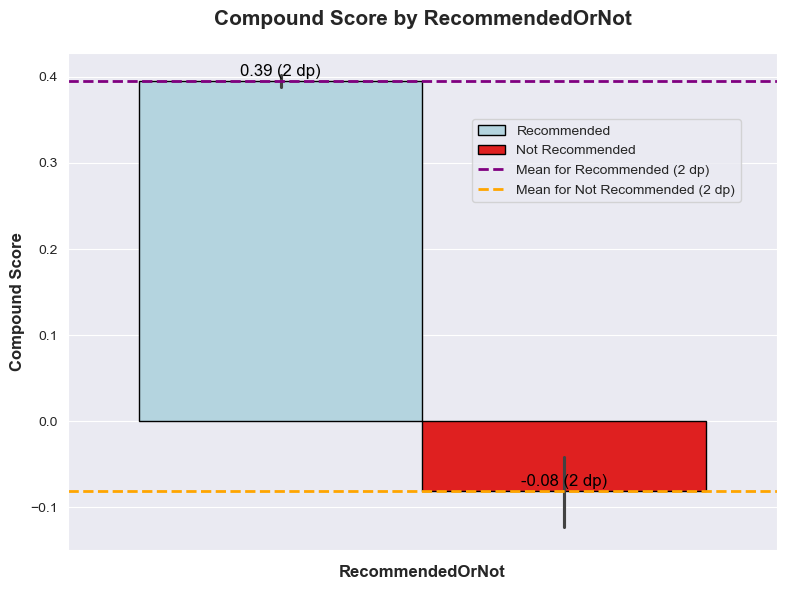

In [35]:
# Plot VADER results (compound scores)
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=vaders, hue='RecommendedOrNot', y='compound', edgecolor='Black', 
                 palette=['lightblue', 'Red'], dodge=True)

# Set title and clean up axes
ax.set_title('Compound Score by RecommendedOrNot', fontsize=15, weight='bold', pad=20)
ax.set_ylabel('Compound Score', fontsize=12, weight='bold')
ax.set_xlabel('RecommendedOrNot', fontsize=12, weight='bold')

# Annotate bars with the mean values
for p in ax.patches:
    height = p.get_height()
    # Annotate bars that are not 0.00
    if height != 0.00:
        ax.annotate(f"{format(height, '.2f')} (2 dp)",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black',
                    xytext=(0, 7), textcoords='offset points')

# Extract stats from stats_df
recommended_mean = stats_df.loc['Recommended', 'mean']
notrecommended_mean = stats_df.loc['Not Recommended', 'mean']

# Add horizontal lines for means with labels
ax.axhline(y=recommended_mean, color='purple', linestyle='--', linewidth=2, label='Mean for Recommended (2 dp)')
ax.axhline(y=notrecommended_mean, color='orange', linestyle='--', linewidth=2, label='Mean for Not Recommended (2 dp)')

# Add legend inside the plot with adjusted position
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(0.56, 0.88))

# Improve the layout and spacing
plt.tight_layout()

plt.savefig('compoundscore_recommendedornot.png')
plt.show()

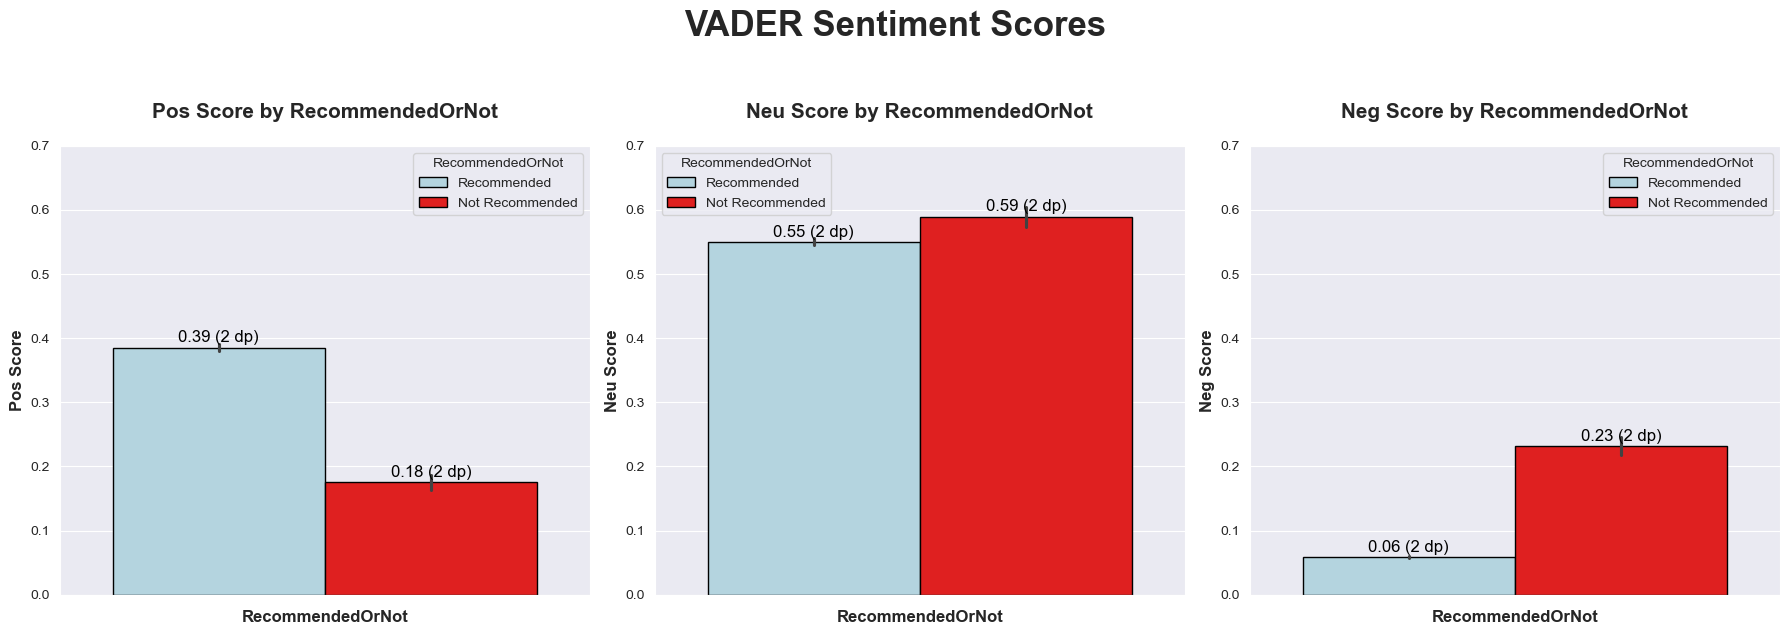

In [36]:
# Plot VADER results (pos, neu, neg)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('VADER Sentiment Scores', fontsize=25, fontweight='heavy', y=1.05)

# List of sentiment types to plot
sentiment_types = ['pos', 'neu', 'neg']

# Calculate the global y-axis limits across all sentiment types
min_y = min(vaders['pos'].min(), vaders['neg'].min(), vaders['neu'].min())
max_y = max(vaders['pos'].max(), vaders['neg'].max(), vaders['neu'].max())

# Iterate over each sentiment type to create a separate plot
for i, sentiment in enumerate(sentiment_types):
    ax = axes[i]
    
    # Plot the VADER results
    sns.barplot(data=vaders, hue='RecommendedOrNot', y=sentiment, ax=ax, edgecolor='Black', 
                palette=['lightblue', 'Red'], dodge=True)
    
    # Set titles and axis labels
    ax.set_title(f'{sentiment.capitalize()} Score by RecommendedOrNot', fontsize=15, weight='bold', pad=20)
    ax.set_ylabel(f'{sentiment.capitalize()} Score', fontsize=12, weight='bold')
    ax.set_xlabel('RecommendedOrNot', fontsize=12, weight='bold')
    
    # Annotate bars with the mean values
    for p in ax.patches:
        height = p.get_height()
        if height != 0.00:  # Only annotate non-zero bars
            ax.annotate(f"{format(height, '.2f')} (2 dp)",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black',
                        xytext=(0, 7), textcoords='offset points')

    # Set the same y-axis limits for all plots
    ax.set_ylim(0, 0.7)

# Improve layout and spacing
plt.tight_layout()

# Save the plot as an image
plt.savefig('vader_sentiment_scores.png')

# Show the plot
plt.show()

<a id = '4.2'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 4.2 ROBERTA PRETRAINED MODEL </h2>

* We will use the [Twitter-roBERTa-base for Sentiment Analysis Model](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment) from Hugging Face to compute the negative, neutral, and positive sentiment scores for each text.
* This is a pretrained RoBERTa-base model trained on approximately 58 million tweets and further fine-tuned for sentiment analysis using the TweetEval benchmark.
* The transformer-based model not only considers individual words but also captures the context in which they appear relative to other words, making it effective for analyzing sentiment in text.

**Interpretation of RoBERTa Model's Scores**: 

* If the positive score is the highest, we categorize the review as having a **positive sentiment**;
* If the negative score is the highest, we categorize the review as having a **negative sentiment**;
* Otherwise, we categorize the review as having a **neutral sentiment**.

# Compute Scores (RoBERTa)

In [37]:
# Disable the warning message
HF_HUB_DISABLE_SYMLINKS_WARNING = 1

# Instantiate our model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [38]:
# Define a function to return polarity scores (RoBERTa Model)
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [39]:
# Compute the polarity scores on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    
    # There are text limits for this model, so we need to catch RuntimeError
    try:
        length = row['ReviewLength']
        text = row['CleanedReviewText']
        myid = row['Id']
        vader_results = sia.polarity_scores(text) # Compute the polarity scores (VADER)
    
        vader_results_rename = {}
        for key, value in vader_results.items():
            vader_results_rename[f"vader_{key}"] = value # Add polarity scores (VADER) into a dictionary

        # To avoid index error, we need to limit the ReviewLength (512 in general, but we use 2048 here and catch error later)
        if length < 2048: 
            roberta_results = polarity_scores_roberta(text) # Compute the polarity scores (roBERTa)

        # Combine both polarity scores into a dictionary
        both = {**vader_results_rename, **roberta_results}
        res[myid] = both
        
    except RuntimeError:
        print(f"Broke for id {myid}")

  0%|          | 0/14951 [00:00<?, ?it/s]

Broke for id 469
Broke for id 1724
Broke for id 2042
Broke for id 3811
Broke for id 4444
Broke for id 4485
Broke for id 4994
Broke for id 5411
Broke for id 5748
Broke for id 6811
Broke for id 8248
Broke for id 8822
Broke for id 12059
Broke for id 12724
Broke for id 12826
Broke for id 13628
Broke for id 14911


In [40]:
# Insert our polarity scores (for both models) into a Pandas DataFrame
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})

# Merge our models DataFrame to our original DataFrame on 'Id'
results_df = results_df.merge(df, how='left')

# See our DataFrame (with sentiment scores and metadata)
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,CleanedReviewText,RecommendedOrNot,ReviewLength,PlayHours,DatePosted
0,1,0.000,1.000,0.000,0.0000,0.206651,0.564798,0.228552,monke,Recommended,5,20.7,14-11-2024
1,2,0.000,1.000,0.000,0.0000,0.044889,0.509324,0.445787,8/10,Recommended,4,51.6,14-11-2024
2,3,0.067,0.481,0.452,0.8402,0.003731,0.044744,0.951525,game awesome hard track move start muscle memo...,Recommended,95,7.3,13-11-2024
3,4,1.000,0.000,0.000,-0.5106,0.419769,0.511056,0.069175,pain,Recommended,4,5.1,13-11-2024
4,5,0.000,1.000,0.000,0.0000,0.206651,0.564798,0.228552,monke,Recommended,5,30.9,13-11-2024


In [41]:
# Reassign 'Id' again since we dropped some rows due to review length being too large
results_df = results_df.reset_index(drop=True)

# Drop the 'Id' column
results_df = results_df.drop(['Id'], axis=1)

# Create an 'Id' column
results_df['Id'] = results_df.index + 1

# Move the 'Id' column to the first column
cols = results_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
results_df = results_df[cols]

# Check if this works
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14934 entries, 0 to 14933
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 14934 non-null  int64  
 1   vader_neg          14934 non-null  float64
 2   vader_neu          14934 non-null  float64
 3   vader_pos          14934 non-null  float64
 4   vader_compound     14934 non-null  float64
 5   roberta_neg        14934 non-null  float64
 6   roberta_neu        14934 non-null  float64
 7   roberta_pos        14934 non-null  float64
 8   CleanedReviewText  14934 non-null  object 
 9   RecommendedOrNot   14934 non-null  object 
 10  ReviewLength       14934 non-null  int64  
 11  PlayHours          14934 non-null  float64
 12  DatePosted         14934 non-null  object 
dtypes: float64(8), int64(2), object(3)
memory usage: 1.5+ MB


In [42]:
# Save our new DataFrame
results_df.to_csv('model_scores.csv', index=False)

In [43]:
# Load our results DataFrame for comparison
df = pd.read_csv('model_scores.csv')

# RoBERTa Scores Visualization

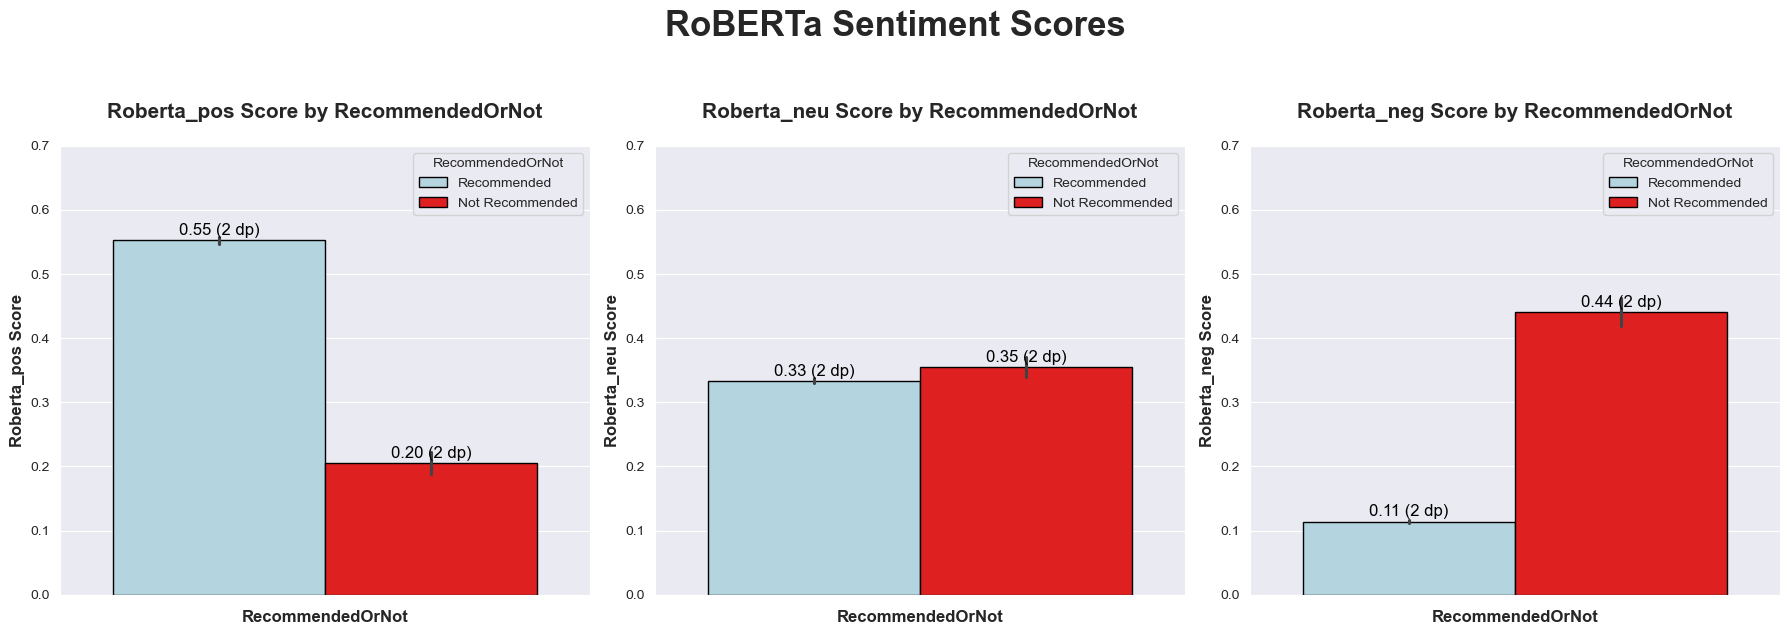

In [44]:
# Plot RoBERTa results (pos, neu, neg)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('RoBERTa Sentiment Scores', fontsize=25, fontweight='heavy', y=1.05)

# List of sentiment types to plot
sentiment_types = ['roberta_pos', 'roberta_neu', 'roberta_neg']

# Calculate the global y-axis limits across all sentiment types
min_y = min(df['roberta_pos'].min(), df['roberta_neg'].min(), df['roberta_neu'].min())
max_y = max(df['roberta_pos'].max(), df['roberta_neg'].max(), df['roberta_neu'].max())

# Iterate over each sentiment type to create a separate plot
for i, sentiment in enumerate(sentiment_types):
    ax = axes[i]
    
    # Plot the VADER results
    sns.barplot(data=df, hue='RecommendedOrNot', y=sentiment, ax=ax, edgecolor='Black', 
                palette=['lightblue', 'Red'], dodge=True)
    
    # Set titles and axis labels
    ax.set_title(f'{sentiment.capitalize()} Score by RecommendedOrNot', fontsize=15, weight='bold', pad=20)
    ax.set_ylabel(f'{sentiment.capitalize()} Score', fontsize=12, weight='bold')
    ax.set_xlabel('RecommendedOrNot', fontsize=12, weight='bold')
    
    # Annotate bars with the mean values
    for p in ax.patches:
        height = p.get_height()
        if height != 0.00:  # Only annotate non-zero bars
            ax.annotate(f"{format(height, '.2f')} (2 dp)",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black',
                        xytext=(0, 7), textcoords='offset points')

    # Set the same y-axis limits for all plots
    ax.set_ylim(0, 0.7)

# Improve layout and spacing
plt.tight_layout()

# Save the plot as an image
plt.savefig('roberta_sentiment_scores.png')

# Show the plot
plt.show()

<a id = '4.3'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 4.3 COMPARE MODELS </h2>

Now, let us compare the two models we used.

In [45]:
# Load our results DataFrame for comparison
df = pd.read_csv('model_scores.csv')

In [46]:
# See our DataFrame (with sentiment scores and metadata)
df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,CleanedReviewText,RecommendedOrNot,ReviewLength,PlayHours,DatePosted
0,1,0.000,1.000,0.000,0.0000,0.206651,0.564798,0.228552,monke,Recommended,5,20.7,14-11-2024
1,2,0.000,1.000,0.000,0.0000,0.044889,0.509324,0.445787,8/10,Recommended,4,51.6,14-11-2024
2,3,0.067,0.481,0.452,0.8402,0.003731,0.044744,0.951525,game awesome hard track move start muscle memo...,Recommended,95,7.3,13-11-2024
3,4,1.000,0.000,0.000,-0.5106,0.419769,0.511056,0.069175,pain,Recommended,4,5.1,13-11-2024
4,5,0.000,1.000,0.000,0.0000,0.206651,0.564798,0.228552,monke,Recommended,5,30.9,13-11-2024


In [47]:
df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'CleanedReviewText',
       'RecommendedOrNot', 'ReviewLength', 'PlayHours', 'DatePosted'],
      dtype='object')

# Evaluate Models

In [48]:
# Evaluate our models for comparison
# Convert y_true to numeric format
df['RecommendedOrNot'] = df['RecommendedOrNot'].map({'Not Recommended': 0, 'Recommended': 1})

# Thresholds for classification
vader_threshold = 0.05  # VADER threshold for classifying positive vs negative
roberta_threshold = 0.5  # RoBERTa threshold for positive vs negative

# Predictions
df['vader_pred'] = (df['vader_compound'] >= vader_threshold).astype(int)
# df['roberta_pred'] = (df['roberta_pos'] >= roberta_threshold).astype(int)

# Predictions based on the highest score for RoBERTa
df['roberta_pred'] = df[['roberta_neg', 'roberta_neu', 'roberta_pos']].idxmax(axis=1)

# Map the predictions to binary values
df['roberta_pred'] = df['roberta_pred'].map({
    'roberta_pos': 1,  # Recommended
    'roberta_neg': 0,  # Not Recommended
    'roberta_neu': 0   # Treat neutral as recommended
})

# Ground Truth
y_true = df['RecommendedOrNot']

# Define a function to compute the weighed_average_f1_score
def compute_weighted_f1(y_test, y_pred):
    return round(f1_score(y_test, y_pred, average='weighted'), 3)
    
# Function to calculate performance metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = round(accuracy_score(y_true, y_pred), 3)
    precision = round(precision_score(y_true, y_pred), 3)
    recall = round(recall_score(y_true, y_pred), 3)
    f1 = round(f1_score(y_true, y_pred), 3)
    weighted_f1 = compute_weighted_f1(y_true, y_pred)
    roc_auc = round(roc_auc_score(y_true, y_pred), 3)
     
    return accuracy, precision, recall, f1, weighted_f1, roc_auc

# Evaluate VADER
vader_scores = evaluate_model(y_true, df['vader_pred'], "VADER")

# Evaluate RoBERTa
roberta_scores = evaluate_model(y_true, df['roberta_pred'], "RoBERTa")

In [49]:
# Create a results dictionary to compare model scores
model_scores = pd.DataFrame({
    'Models': ['VADER', 'RoBERTa'],
    'Accuracy': [vader_scores[0], roberta_scores[0]],
    'Precision': [vader_scores[1], roberta_scores[1]],
    'Recall': [vader_scores[2], roberta_scores[2]],
    'F1 Score': [vader_scores[3], roberta_scores[3]],
    'Weighted Average F1 Score': [vader_scores[4], roberta_scores[4]],
    'ROC AUC Score': [vader_scores[5], roberta_scores[5]]   
})

In [50]:
# Look at our results
model_scores

,Models,Accuracy,Precision,Recall,F1 Score,Weighted Average F1 Score,ROC AUC Score
0,VADER,0.654,0.968,0.655,0.781,0.747,0.646
1,RoBERTa,0.586,0.982,0.572,0.723,0.693,0.695


# Models Comparison Visualization

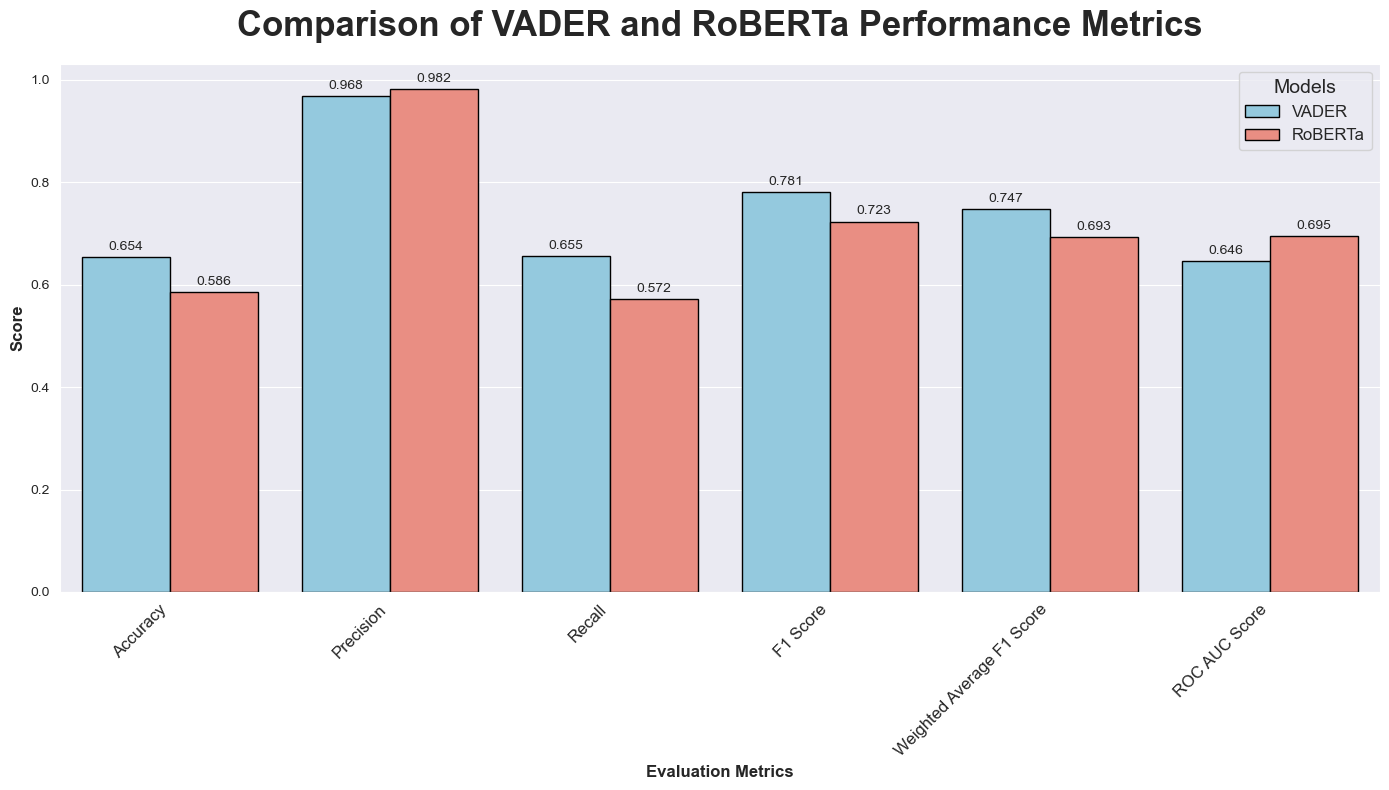

In [52]:
# Plot Models Comparison (Metrics)
# Reshape the DataFrame to long format
model_scores_melted = model_scores.melt(id_vars='Models', var_name='Metric', value_name='Score')

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a barplot
sns.barplot(
    data=model_scores_melted,
    x='Metric',
    y='Score',
    hue='Models',
    palette=['skyblue', 'salmon'],
    edgecolor='black'
)

# Set the title and labels
plt.title('Comparison of VADER and RoBERTa Performance Metrics', fontsize=25, weight='bold', pad=20)
plt.xlabel('Evaluation Metrics', fontsize=12, weight='bold')
plt.ylabel('Score', fontsize=12, weight='bold')

# Rotate x labels for better readability if necessary
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add legend title
plt.legend(title='Models', fontsize=12, title_fontsize=14)

# Annotate bars with their scores
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.3f', fontsize=10, padding=3)

# Adjust layout for better fit
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('model_comparison_metrics.png', dpi=300)

# Display the plot
plt.show()

# Which Model Performed Better?

Based on the performance metrics, here’s the evaluation:

1. **Accuracy**: VADER (0.654) > RoBERTa (0.586)
   
    VADER correctly predicts a larger percentage of overall instances compared to RoBERTa. However, in our case, this can be misleading since we are dealing with an imbalanced dataset (majority of of our targets are 'Recommended'.

2. **Precision**: RoBERTa (0.982) > VADER (0.968)

    RoBERTa is slightly better at **avoiding false positives**. This means when it predicts 'Recommended', it's correct more often.

3. **Recall (True Positive Rate)**: VADER (0.655) > RoBERTa (0.572)

    VADER is better at identifying positive cases 'Recommended'. This means VADER captures more of the 'Recommended' instances.

4. **F1 Score**: VADER (0.781) > RoBERTa (0.723)

    This implies that VADER achieves slightly better balance between precision and recall.

5. **Weighted Average F1 Score**: VADER (0.747) > RoBERTa (0.693)

    VADER performs better in our case since it handles the imbalance (of our dataset) slightly better.

6. **ROC AUC Score**: RoBERTa (0.695) > VADER (0.646)

    RoBERTa has a higher area under the ROC curve. This implies that RoBERTa is better at ranking probabilities and distinguishing between the two classes ('Recommended' and 'Not Recommended' overall).

# Summary

*VADER* performs better in terms of **accuracy**, **recall**, **F1-Score**, and **Weighted Average F1 Score**.

*RoBERTa* performs better in terms of **precision** and **ROC AUC Score**.

# Some Examples

In [53]:
# Look at the 'Not Recommended' Review with the highest positive polarity score (VADER)
df.query("RecommendedOrNot == 0") \
    .sort_values('vader_pos', ascending=False)['CleanedReviewText'].values[0]

'special'

In [54]:
# Look at the 'Not Recommended' Review with the highest positive polarity score (RoBERTa)
df.query("RecommendedOrNot == 0") \
    .sort_values('roberta_pos', ascending=False)['CleanedReviewText'].values[0]

'atrocious bos design inaccessible story outsidersevery single bos almost exclusively delayed attack least one bos deal guarantee damage cutscenes frankly understand good review game get boss uniquely bad baffle edit critique elaborate hate much want diffuse frustration never write review absolute nonsense put boss fascinate someone comment skill issue well play almost every major soul game never complain boss except prime radahn prepatch also every skill issue guy loser nothing contribute boss design thanks come ted talkelaboration bos design occasinal spoiler warnedfirst issue difficulty time spent average bos bmw miniscule compare average time fromsoft bos take issue are1 way many attack delay boss often contort body comical fashion yaksha best example manage heroic feat bait player early dodge get hit cheap design worse yet whenever happen completely pull experience break immersion every time mythical creature enemy possible world would attack like attack optimize fool player get g

In [55]:
# Look at the 'Recommended' Review with the highest negative polarity score (VADER)
df.query("RecommendedOrNot == 1") \
    .sort_values('vader_neg', ascending=False)['CleanedReviewText'].values[0]

'wicked'

In [56]:
# Look at the 'Recommended' Review with the highest negative polarity score (RoBERTa)
df.query("RecommendedOrNot == 1") \
    .sort_values('roberta_neg', ascending=False)['CleanedReviewText'].values[0] # SARCASM DETECTED !!

'hate game much suck bad hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate hate black bear yaoguai jump cliff noooooooooooooooooooooooooooow'

<a id = '5'></a>

<h2 style = "font-family: Serif; font-size: 50px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 5. CONCLUSION </h2>

<a id = '5.1'></a>

<h2 style = "font-family: Serif; font-size: 35px; font-style: normal; letter-spacing: 3px; background-color: #f6f6f6; color: #0D0D0F; border-radius: 100px 100px; text-align: center;"> 5.1 WHAT CAN WE IMPROVE ON? </h2>

1. In [Section 3.2](#3.2) when we were doing **keyword analysis**, there might be better/more accurate ways to improve our analysis by adding relevant words in our positive & negative themes dictionaries. Also, there might be duplicates of words in the same review (e.g. someone mentioned good for multiple times in a single review). Moreover, there might be typos/spelling in the reviews.
   
2. In [Section 4.3](#4.3) when we were comparing models, RoBERTa should perform better than VADER in theory (since it is a transformer-based model and is more sophisticated than VADER). However, its performance ultimately depends on the following factors:

    * **Imbalanced Dataset**: Our dataset is imbalanced, which can heavily influence the performance of the model. For instance, RoBERTa might overfit to the majority class `Recommended` due to its complicated nature, whereas a rule-based model such as VADER is simpler and might perform better on such imbalanced dataset.
      
    * **Thresholding**: RoBERTa predictions are based on probabilities, and selecting a fixed threshold might not be optimal for our dataset (A different threshold might yield better results). As a reminder, we chose the outcome with the largest probability in our case.
   
    * **Fine-tuning**: Without training it specifically on our dataset, RoBERTa might not generalize well.
      
    * **Task Alignment**: Pre-trained RoBERTa was tuned for tweets, not for game reviews, which might differ in styles and vocabulary.

    To further improve our RoBERTa model, we can do the following:
   
    * **Fine-tune RoBERTa**: Train the model on our game review dataset to adapt it better to the task.
  
    * **Re-adjust Thresholds**: Since our dataset is imbalanced, we could adjust the threshold to obtain better predictions.
  
    * **Balance Our Dataset**: We could use techniques such as undersampling or oversampling (SMOTE) to address class imbalance between `Recommended` and `Not Recommended`.
  
    * **Try Other Models**: We would explore more models which will give us a broader perspective on how well our game reviews are being analyzed (different models have different pros and cons). For example:
        * BERT/DistilBERT - These are simpler models compared to RoBERTa.
        * XLNet/ALBERT - These models are also variations of transformer-based models that could be useful for sentiment analysis tasks.
        * LightGBM/XGBoost - Non-deep learning models that might work well (after feature engineering).
        * Emsemble Models - Combine the strengths of both VADER and RoBERTa using an ensemble model, which could provide a more robust prediction.

3. We could analyse reviews for other games by obtaining data (reviews) from Steam, twitter, reddit etc.